#Gráficas del problema de Dirichlet

Para resolver la ecuación de Laplace

$$\frac{∂^2u}{∂x^2}+\frac{∂^2u}{∂y^2}=0,    0<x<1,    0<y<1$$


Para las condiciones de frontera

(a) $u(0,y)=u(1,y)=0; u(x,0)=100; u(x,1)=200$

Está dada en términos de la serie de Fourier por la expresión:
$$u(x,y)=\sum_{n=1}^{∞}200(\dfrac{1-(-1)^n}{n\pi})((cosh(n\pi y)+(2 csch(n\pi) - coth (n\pi)(sinh(n\pi y))sin (n\pi x)$$


---



Para empezar gráficamos la condiciones de Frontera

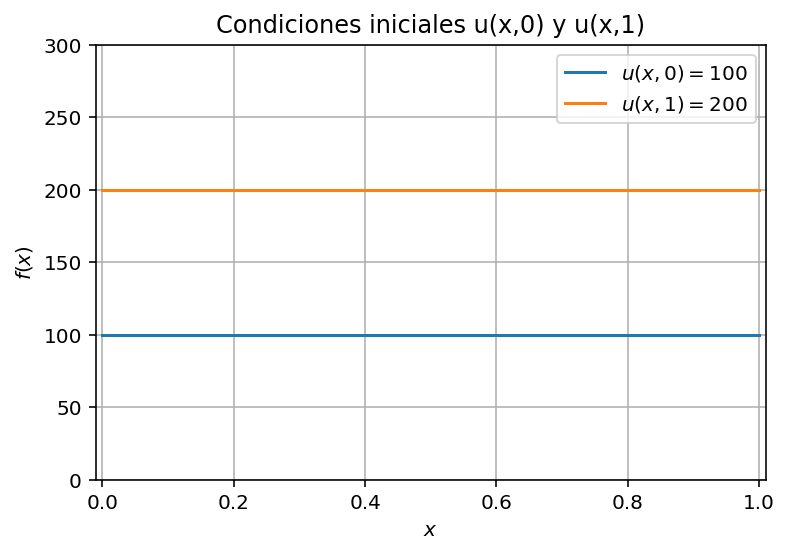

In [ ]:
from pylab import *
from matplotlib import animation,rc 
from IPython.display import HTML 
%config InlineBackend.figure_format = 'retina'
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        if (x[i] >= 0) and (x[i] <= 1):
          y[i] = 100
    return y
def recta_1(x):
    y = zeros(len(x))
    for i in range(len(x)):
        if (x[i] >= 0) and (x[i] <= 1):
          y[i] = 200
    return y
x = linspace(0,1,1000)
f = recta(x)
f_1 = recta_1(x)
plot(x,f,label='$u(x,0)=100$')
plot(x,f_1,label='$u(x,1)=200$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condiciones iniciales u(x,0) y u(x,1)")
xlim([-0.01,1.01]),ylim([-0.01,300]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición de frontera $u(x,0)=F(0)=100$ y $u(x,1)=g(x)=200$.

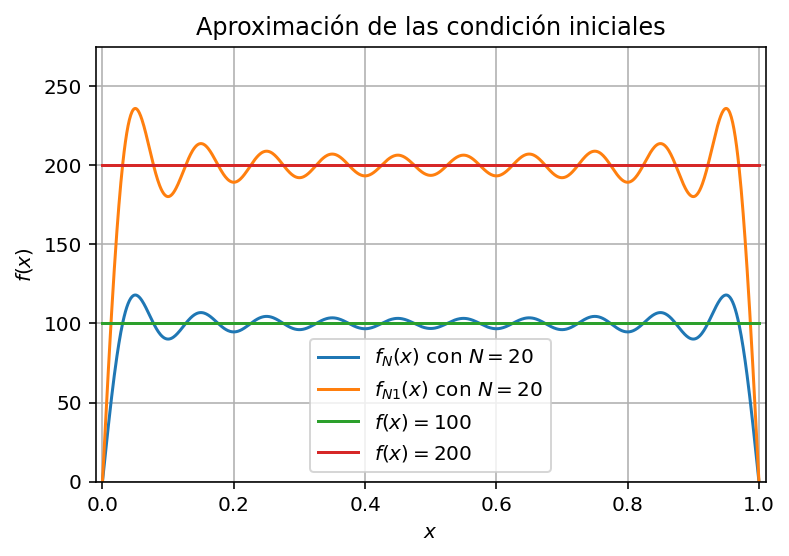

In [ ]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += 200.0*(1.0-cos(n*pi))*sin(n*pi*x)/(n*pi)
    return (f)
def u_1(x,N=20): # N es el número de armónicos
    f_1 = zeros(len(x))
    for n in range(1,N):
        f_1 += 400.0*(1.0-cos(n*pi))*sin(n*pi*x)/(n*pi)
    return (f_1)
f_n = u_0(x)
f_n1 = u_1(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f_n1,label='$f_{N1}(x)$ con $N=20$')
plot(x,f,label='$f(x)=100$')
plot(x,f_1,label='$f(x)=200$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de las condición iniciales")
xlim([-0.01,1.01]),ylim([-0.01,275]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

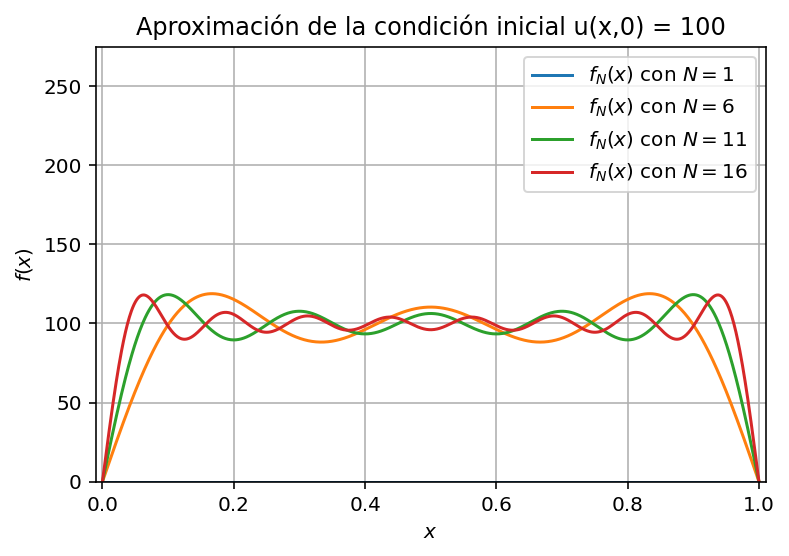

In [ ]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial u(x,0) = 100")
xlim([-0.01,1.01]),ylim([-0.01,275]),grid(),legend()
show()

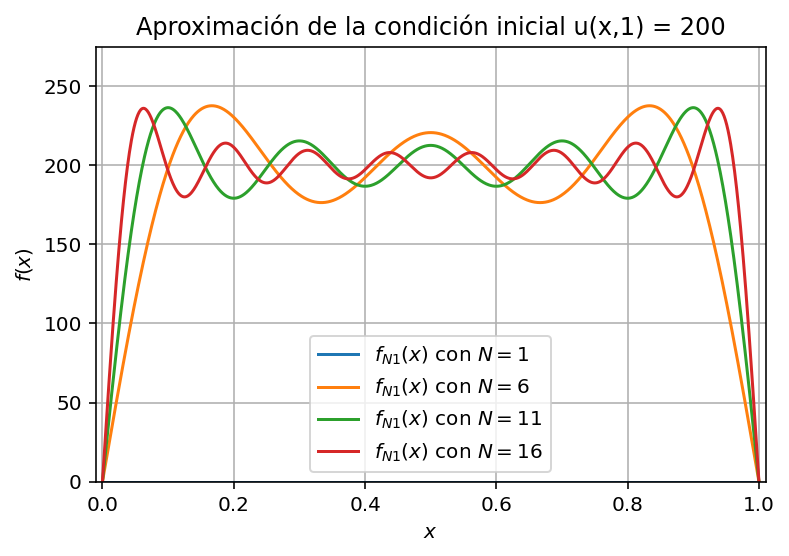

In [ ]:
for i in range(1,20,5):
    plot(x,u_1(x,i),label='$f_{N1}(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial u(x,1) = 200")
xlim([-0.01,1.01]),ylim([-0.01,275]),grid(),legend()
show()


Ahora, agregamos la parte de y para visualizar la solución completa $y=0$

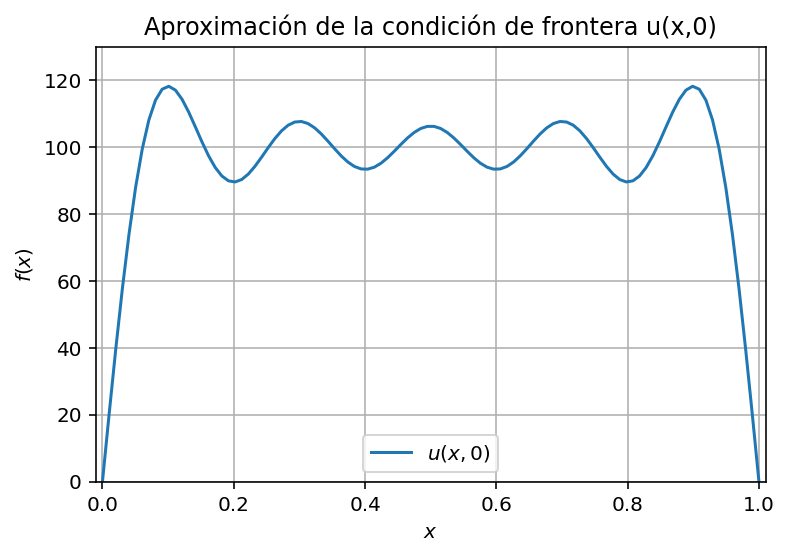

In [ ]:
def u_x_y(x,y,N=10):
    f = zeros( (len(x),len(y)) )
    for i in range(len(y)):
        for n in range(1,N):
            f[:,i] += (((1-(-1)**n)*cosh(n*pi*y[i])/n)+((1-(-1)**n)*(2-cosh(n*pi))/(n*sinh(n*pi)))*sinh(n*pi*y[i]))*sin(n*pi*x)
    return (200.0/pi)*f
x = linspace(0,1,100)
y =10*linspace(0,1,100)
U = u_x_y(x,y)
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición de frontera u(x,0)")
xlim([-0.01,1.01]),ylim([0.0,130.05]),grid(),legend()
show()


Luego, para diferentes valores de y, lo cual nos permite ver cómo la solución evoluciona cuando $y\rightarrow 1$

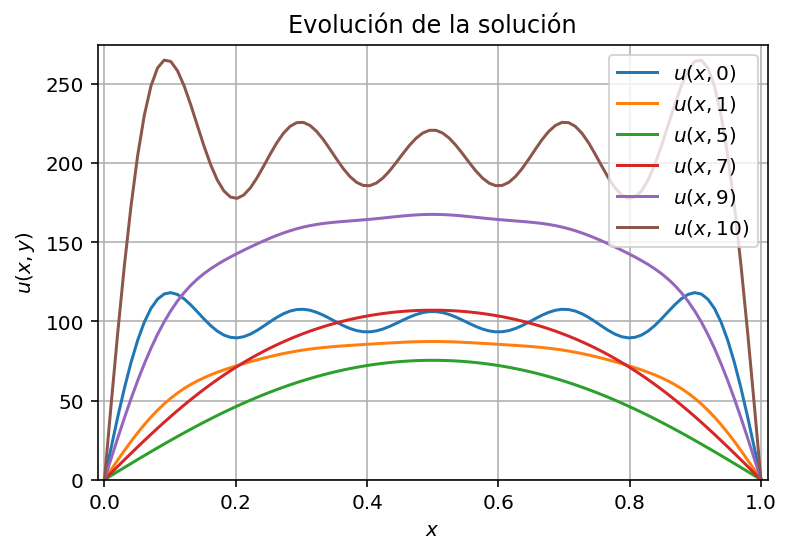

In [ ]:
plot(x,U[:,0],label='$u(x,0)$') 
plot(x,U[:,1],label='$u(x,1)$')
plot(x,U[:,5],label='$u(x,5)$')
plot(x,U[:,7],label='$u(x,7)$')
plot(x,U[:,9],label='$u(x,9)$')
plot(x,U[:,10],label='$u(x,10)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,y)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,275]),grid(),legend()
show()


Y podemos ver esto en una gráfica en 3D.

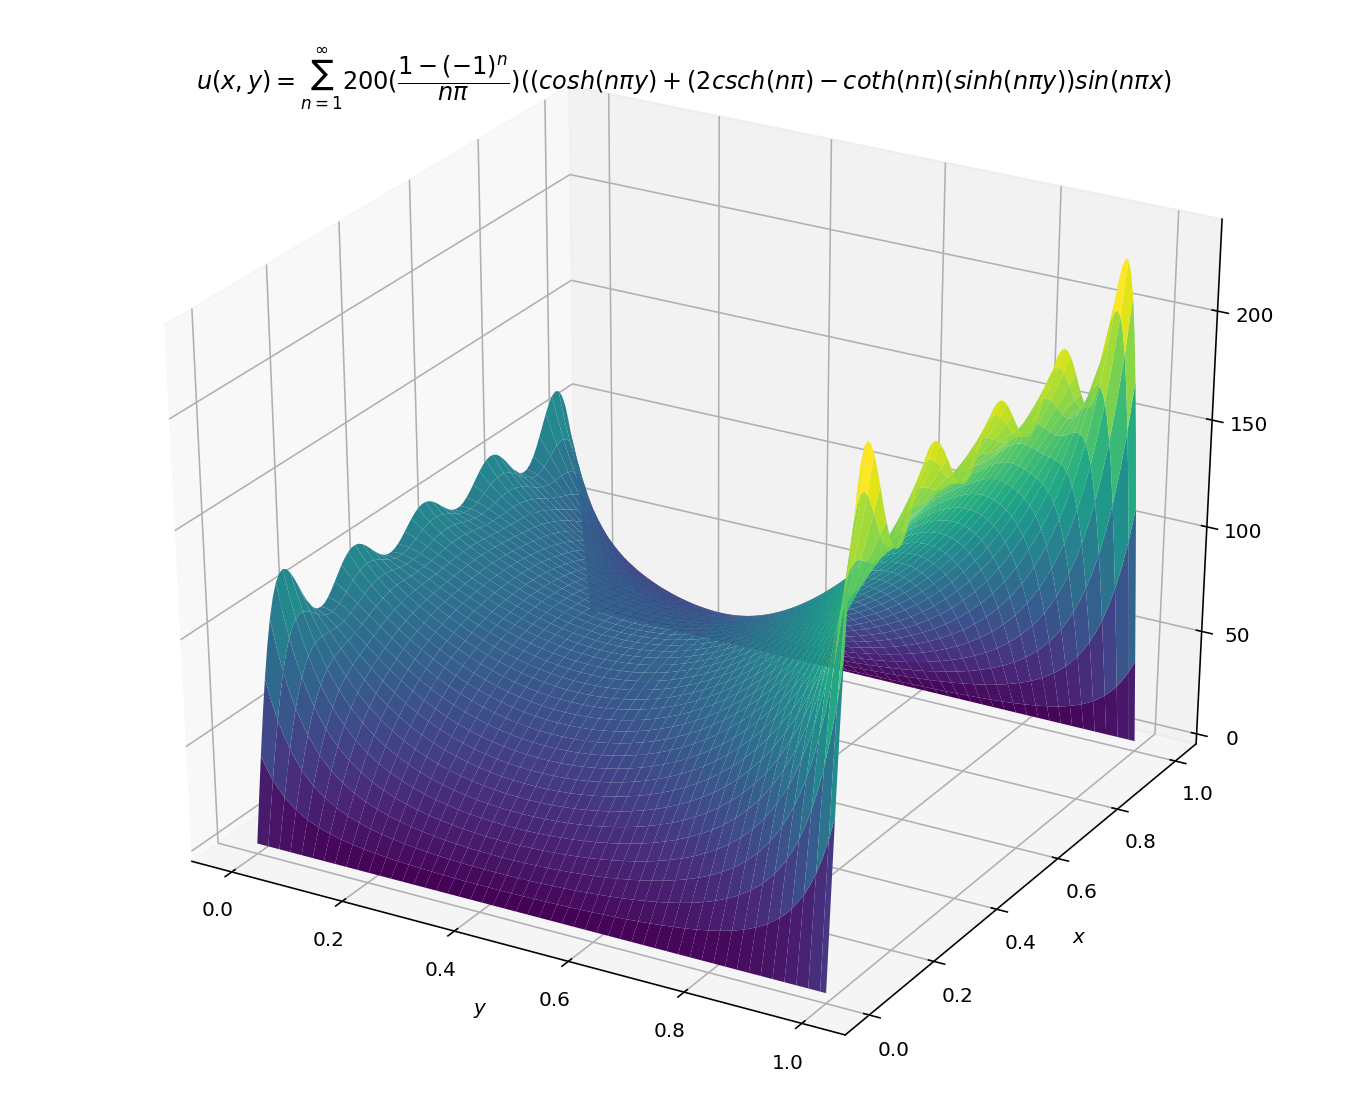

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0.0,1.0,100)
y = linspace(0.0,1.0,100)

X,Y = np.meshgrid(x,y)

U = u_x_y(x,y)

plt.xlabel('$y$'); plt.ylabel('$x$'); 
plt.title('$u(x,y)=\sum_{n=1}^{∞}200(\dfrac{1-(-1)^n}{n\pi})((cosh(n\pi y)+(2 csch(n\pi) - coth (n\pi)(sinh(n\pi y))sin (n\pi x)$')
ax.plot_surface(X, Y, U, cmap="viridis"); #Otros colores:"viridis", "inferno", "plasma"